In [1]:
from jenga.corruptions import DuckDBCorruptionBrokenCharacters, BrokenCharacters
import pandas as pd
import duckdb
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("./data/Grocery_and_Gourmet_Food_5.json", lines=True)
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN
1,5,True,"10 13, 2016",A3GEOILWLK86XM,4639725183,itsjustme,Gift for college student.,Great product.,1476316800,NaN,NaN,NaN
2,5,True,"11 21, 2015",A32RD6L701BIGP,4639725183,Krystal Clifton,"If you like strong tea, this is for you. It mi...",Strong,1448064000,NaN,NaN,NaN
3,5,True,"08 12, 2015",A2UY1O1FBGKIE6,4639725183,U. Kane,Love the tea. The flavor is way better than th...,Great tea,1439337600,NaN,NaN,NaN
4,5,True,"05 28, 2015",A3QHVBQYDV7Z6U,4639725183,The Nana,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,1432771200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1143855,5,True,"09 8, 2017",A223YRQH2Z5T1D,B01HJF6FRA,flint5292,"As a new vegan, it is sometimes difficult to r...","As a new vegan, it is sometimes difficult to ...",1504828800,4,NaN,NaN
1143856,5,True,"08 4, 2017",A38GDA4TB9EILT,B01HJF6FRA,Moriah Bolyard,The best thing ever is ordering a product you ...,The best thing ever is ordering a product you ...,1501804800,3,NaN,NaN
1143857,5,True,"07 4, 2017",A2025PN7HDC5BO,B01HJF6FRA,M.C,I used to love ranch before I became vegan. It...,Just what the vegan ordered!,1499126400,5,NaN,NaN
1143858,5,True,"06 7, 2017",A1NY7XWC7EPQOA,B01HJF6FRA,Greensboro,I cannot have dairy nor gluten. This is as cl...,This is as close to Ranch as I will ever be ab...,1496793600,2,NaN,NaN


In [3]:
random.seed(4521)
seeds = [random.random() for _ in range(10)]
seeds

[0.3456024946527071,
 0.8828002995188382,
 0.8941452105042462,
 0.8300639147985089,
 0.24067149168967916,
 0.6736024387273982,
 0.3222605525484046,
 0.8359137596186322,
 0.08139784162609232,
 0.4955099004924244]

In [ ]:
duck_computing_time = []
duckdb.sql("SET threads = 1")
for seed in seeds:
    duckdb.sql(f"SELECT setseed({seed})")
    duckdb_corruption = DuckDBCorruptionBrokenCharacters("reviewText", 0.2)
    start = time.time()
    duckdb_corruption.transform(df)
    end = time.time()
    duck_computing_time.append(end - start)
duck_computing_time

In [3]:
# This were the results of the experiment
duck_computing_time = [
    56.379162311553955,
    45.79448199272156,
    53.21978259086609,
    49.483625173568726,
    48.91889500617981,
    52.05965709686279,
    47.06034827232361,
    45.97737526893616,
    49.353299617767334,
    49.73344278335571
]

In [ ]:
duckdb_multiple_threads_computing_time = []
duckdb.sql("SET threads = 4")
for seed in seeds:
    duckdb.sql(f"SELECT setseed({seed})")
    duckdb_corruption = DuckDBCorruptionBrokenCharacters("reviewText", 0.2)
    start = time.time()
    duckdb_corruption.transform(df)
    end = time.time()
    duckdb_multiple_threads_computing_time.append(end - start)

duckdb_multiple_threads_computing_time

In [ ]:
duckdb_multiple_threads_computing_time = [
    58.86254072189331,
    47.50891900062561,
    47.77925133705139,
    49.86981225013733,
    45.86521124839783,
    50.89463400840759,
    47.12282633781433,
    50.97922658920288,
    51.78722262382507,
    53.28171372413635
]

In [10]:
computing_time_jenga = []
for seed in seeds:
    random.seed(seed)
    duckdb_corruption = BrokenCharacters("reviewText", 0.2)
    start = time.time()
    duckdb_corruption.transform(df)
    end = time.time()
    computing_time_jenga.append(end - start)
    print(end - start)
# Here the result of experiments done on the machine 
computing_time_jenga

105.71946358680725
112.38954043388367
114.71290516853333
103.92811894416809
113.79899501800537
109.98125863075256
116.37976813316345
102.42627382278442
108.20121622085571
104.77867007255554


[]

In [4]:
computing_time_jenga = [
    105.71946358680725,
    112.38954043388367,
    114.71290516853333,
    103.92811894416809,
    113.79899501800537,
    109.98125863075256,
    116.37976813316345,
    102.42627382278442,
    108.20121622085571,
    104.77867007255554
]

In [5]:

df_results = pd.DataFrame(columns=["type", "timespan"])
df_results = pd.concat([
    df_results, 
    pd.DataFrame([ { "type": "Jenga", "timespan": t} for t in computing_time_jenga]),
    pd.DataFrame([ { "type": "DuckDB", "timespan": t} for t in duck_computing_time]),
])
df_results

/tmp/ipykernel_2194163/1261906610.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([


,type,timespan
0,Jenga,105.719464
1,Jenga,112.389540
2,Jenga,114.712905
3,Jenga,103.928119
4,Jenga,113.798995
5,Jenga,109.981259
6,Jenga,116.379768
7,Jenga,102.426274
8,Jenga,108.201216
9,Jenga,104.778670


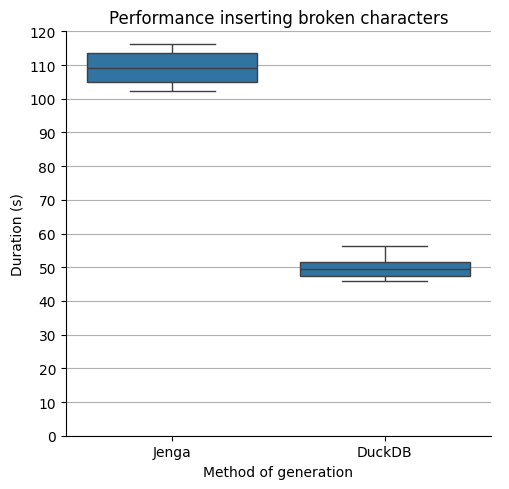

In [12]:
fig = sns.catplot(data=df_results, x="type", y="timespan", kind="box")
fig.set_axis_labels(
    "Method of generation",
    "Duration (s)"
)
fig.set(title="Performance inserting broken characters")
fig.set(yticks=list(range(0, 121, 10))) # <--- set the ticks first
plt.ylim(0, 120)
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("performance_plt.png", dpi=300)

In [18]:
r = df_results.groupby(["type"]).median()
r.get_group("Jenga")

AttributeError: 'DataFrame' object has no attribute 'group'